# Problem statement: Predict delivery time using sorting time

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\User\\Documents\\ExcelR\\Assignments\\Assignment 4- Linear Regression\\delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.shape

(21, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

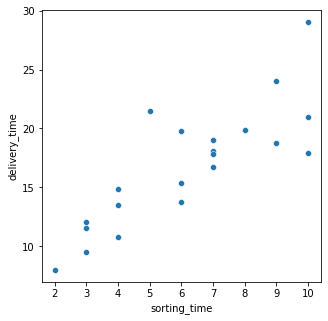

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(x='sorting_time', y='delivery_time', data=data, palette='set1')

# Correlation

In [7]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

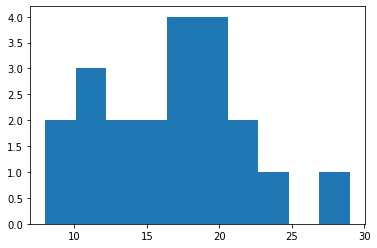

In [8]:
plt.hist(data['delivery_time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

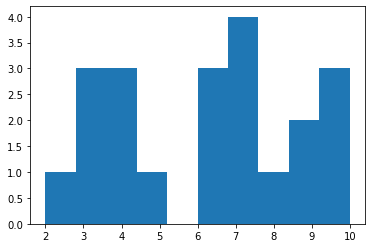

In [9]:
plt.hist(data['sorting_time'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

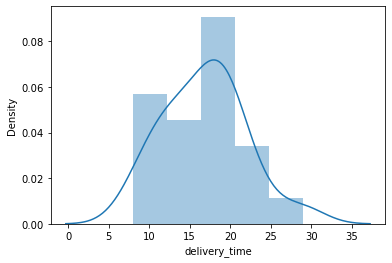

In [10]:
sns.distplot(data['delivery_time'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

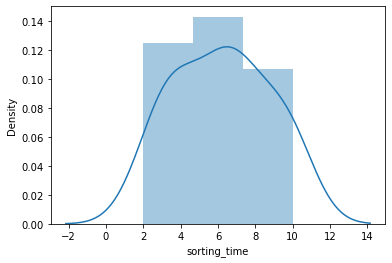

In [11]:
sns.distplot(data['sorting_time'])

# Fitting a linear regression model

In [12]:
import statsmodels.formula.api as smf

In [13]:
#Linear model
model = smf.ols('delivery_time~sorting_time',data=data).fit()

Text(0.5, 1.0, 'Plotting the best fit line')

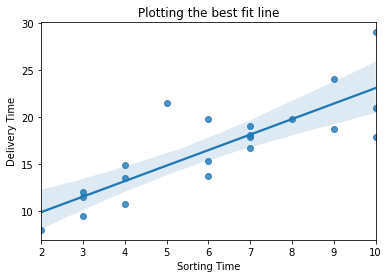

In [14]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x='sorting_time', y='delivery_time',data=data)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Plotting the best fit line')

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        13:46:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#R Squared Values & R Adjusted Squared Values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [17]:
6.582734 + 1.649020*10

23.072933999999997

In [18]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Log Transformation

In [20]:
model1 = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

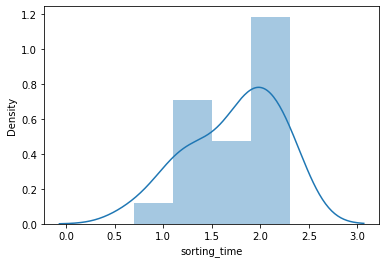

In [21]:
sns.distplot(np.log(data['sorting_time']))

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        13:47:11   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1.fittedvalues

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

## Exponential Transformation

In [24]:
model2 = smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 28 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                           13:47:39   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.rsquared, model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

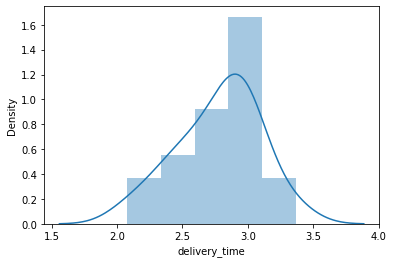

In [27]:
sns.distplot(np.log(data['delivery_time']))

In [28]:
exp_pred = np.exp(model2.fittedvalues)

## Plotting the best fit line for each model

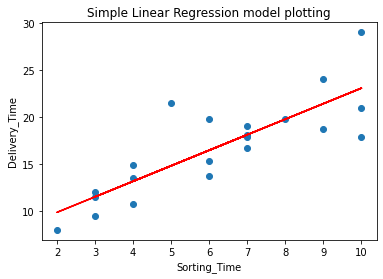

In [29]:
#Linear model
plt.scatter(x=data['sorting_time'],y=data['delivery_time'])
plt.plot(data['sorting_time'],model.fittedvalues,color='red')
plt.title("Simple Linear Regression model plotting")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

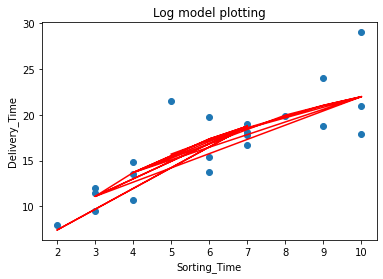

In [30]:
#Log Transformation
plt.scatter(x=data['sorting_time'],y=data['delivery_time'])
plt.plot(data['sorting_time'],model1.fittedvalues,color='red')
plt.title("Log model plotting")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

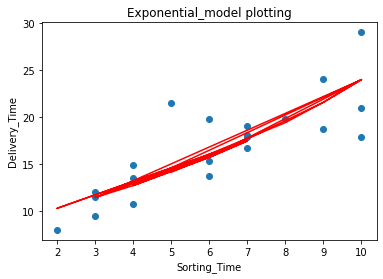

In [31]:
#Exponential model
plt.scatter(x=data['sorting_time'],y=data['delivery_time'])
plt.plot(data['sorting_time'],exp_pred,color='red')
plt.title("Exponential_model plotting")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

### Calculating Root Mean Squared Error(RMSE)

In [32]:
#RMSE for SLR model
np.sqrt(np.mean((data.delivery_time-model.fittedvalues)**2))

2.7916503270617654

In [33]:
#RMSE for Log model
np.sqrt(np.mean((data.delivery_time-model1.fittedvalues)**2))

2.733171476682066

In [34]:
#RMSE for Exponential model
np.sqrt(np.mean((data.delivery_time-model2.fittedvalues)**2))

14.795516941016686

### From the above RMSE we can say that the log model has the lowest value

# Predict for new data

In [35]:
#Predict for sorting time 4,7 and 11 
newdata=pd.Series([4,7,11]) 
newdata

0     4
1     7
2    11
dtype: int64

In [36]:
new_pred = pd.DataFrame(newdata, columns=['sorting_time'])
new_pred

,sorting_time
0,4
1,7
2,11


In [37]:
model.predict(new_pred)

0    13.178814
1    18.125873
2    24.721953
dtype: float64

In [38]:
new_pred['Predicted'] = model.predict(new_pred)
new_pred

,sorting_time,Predicted
0,4,13.178814
1,7,18.125873
2,11,24.721953


In [39]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [45]:
#Manual Calculations
print(6.582734 + 1.649020*4)
print(6.582734 + 1.649020*7)
print(6.582734 + 1.649020*11)

13.178814
18.125874
24.721953999999997


In [46]:
model1.predict(new_pred)

0    13.696517
1    18.757354
2    22.844842
dtype: float64

In [47]:
new_pred['LogModel_Predicted'] = model1.predict(new_pred)
new_pred

,sorting_time,Predicted,LogModel_Predicted,ExpModel_Predicted
0,4,13.178814,13.696517,2.543578
1,7,18.125873,18.757354,2.860233
2,11,24.721953,22.844842,3.282439


In [48]:
model2.predict(new_pred)

0    2.543578
1    2.860233
2    3.282439
dtype: float64

In [49]:
new_pred['ExpModel_Predicted'] = model2.predict(new_pred)
new_pred

,sorting_time,Predicted,LogModel_Predicted,ExpModel_Predicted
0,4,13.178814,13.696517,2.543578
1,7,18.125873,18.757354,2.860233
2,11,24.721953,22.844842,3.282439
